# Demo 3 : Street Networks 

Imports we will need for the demo :

## 1. Street Network 

In [ ]:
# imports
import networkx as nx

import osmnx as ox

import geopandas as gpd

import matplotlib.pyplot as plt

In [ ]:
# Area of interest
city_aoi = "san pedro, ivory coast"

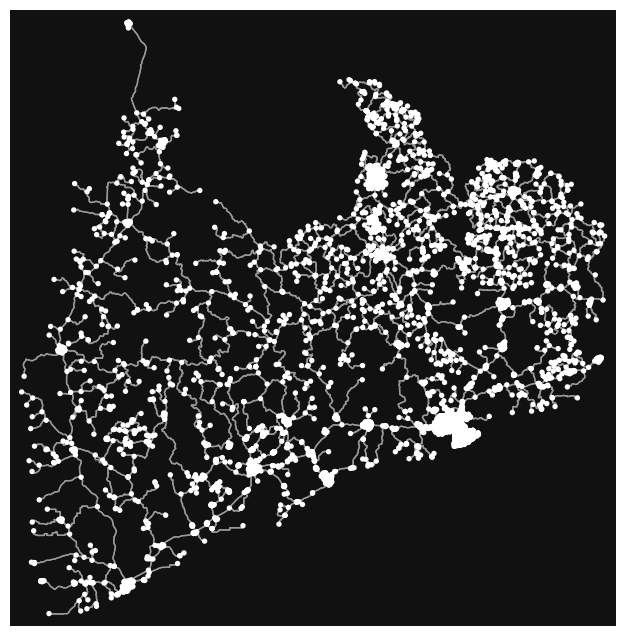

In [ ]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place(city_aoi, network_type="drive")
fig, ax = ox.plot_graph(G)

As you might remember, the object type of the `ox.graph_from_place()` function is a MultiDiGraph object. And this object can be converted into: 
 1. Undirected Multigraph:  This will remove the directionality of the edges and merge parallel edges between the same pair of nodes.
 2. DiGraphs without parallel edges : This will simplify the graph by removing parallel edges while preserving the directionality of the edges
 3. GeoPandas node/edge GeoDataFrame : This will create two GeoDataFrames, one containing the nodes and their attributes, and the other containing the edges and their attributes.

In [ ]:
# 1. convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

Using an undirected MultiGraph can be useful in certain scenarios where the directionality of edges is not significant or when you want to simplify the analysis of the network. 

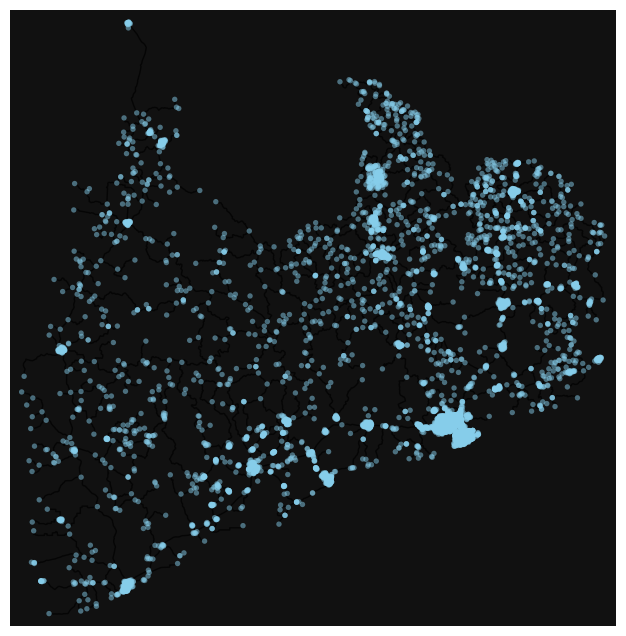

In [ ]:
# 1. Convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# 2. Plot the undirected MultiGraph
fig, ax = ox.plot_graph(
    M,
    node_color="skyblue",
    node_size=15,
    edge_color="black",
    edge_alpha=0.7,
    node_alpha=0.5,
    show=True,
    close=False,
)

# Display the plot
plt.show()

In [ ]:
# 2. convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

# 3.  convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [ ]:
D.nodes.data()

NodeDataView({443381760: {'y': 4.5544752, 'x': -7.1868347, 'street_count': 3}, 476555614: {'y': 4.7140011, 'x': -7.4683046, 'street_count': 4}, 1091671513: {'y': 4.4645272, 'x': -7.3844996, 'street_count': 3}, 1163842070: {'y': 4.5473393, 'x': -7.3127395, 'street_count': 3}, 1163842127: {'y': 4.555106, 'x': -7.3147986, 'street_count': 3}, 1163842255: {'y': 4.5059802, 'x': -7.284022, 'street_count': 3}, 1163842301: {'y': 4.5091686, 'x': -7.2977301, 'street_count': 3}, 2989005829: {'y': 4.5182248, 'x': -7.1920711, 'street_count': 1}, 3458505508: {'y': 4.6667602, 'x': -7.0845233, 'street_count': 3}, 4256115481: {'y': 4.4299525, 'x': -7.3592117, 'street_count': 4}, 4256115597: {'y': 4.4309767, 'x': -7.3574616, 'street_count': 3}, 4256132259: {'y': 4.4264921, 'x': -7.3525277, 'street_count': 3}, 4256132264: {'y': 4.426669, 'x': -7.3522777, 'street_count': 3}, 4256132907: {'y': 4.4274026, 'x': -7.3503135, 'street_count': 3}, 4256132947: {'y': 4.4286429, 'x': -7.3508496, 'street_count': 3}, 4

We will be using the GeoDataFrame. 
So we can visualised both gdfs: 


In [ ]:
# Visualize the nodes gdf
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
443381760,4.554475,-7.186835,3,NaN,POINT (-7.18683 4.55448)
476555614,4.714001,-7.468305,4,NaN,POINT (-7.46830 4.71400)
1091671513,4.464527,-7.384500,3,NaN,POINT (-7.38450 4.46453)
1163842070,4.547339,-7.312740,3,NaN,POINT (-7.31274 4.54734)
1163842127,4.555106,-7.314799,3,NaN,POINT (-7.31480 4.55511)


Important things to understand about the gdf_node table: 

 - osmid : is the OpenStreetMaps id 
 - y: This column represents the latitude coordinates of each node.
 - x: This column represents the longitude coordinates of each node.
 - street_count: This column represents the number of streets (or edges) connected to each node.
 - highway: Type of highway or road.
 - geometry: This column contains the geometric representation of each node, stored as POINT geometry objects. These POINT objects represent the spatial location of each node in the form of longitude and latitude coordinates.

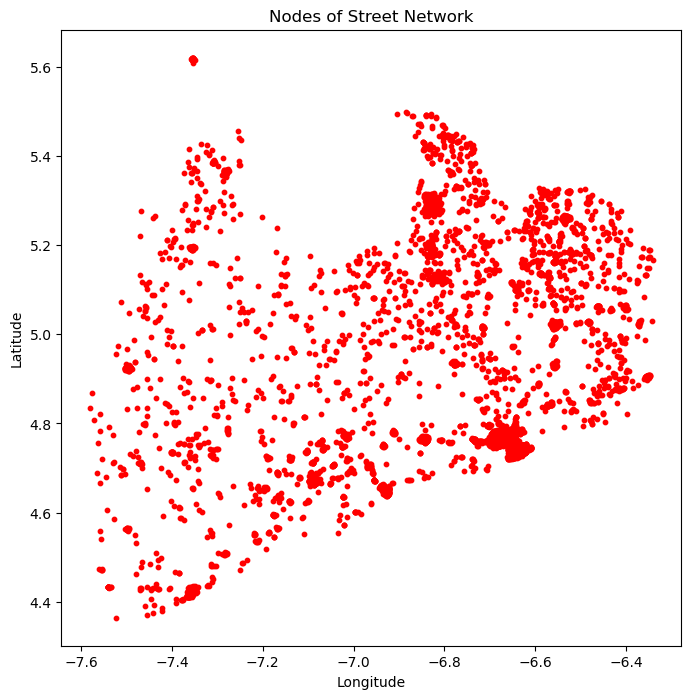

In [ ]:
# Plot the nodes
plt.figure(figsize=(8, 8))
plt.scatter(
    gdf_nodes["x"], gdf_nodes["y"], color="red", s=10
)  # Scatter plot of node coordinates

# Add title and axis labels
plt.title("Nodes of Street Network")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

In [ ]:
# Visualize the edge gdf
gdf_edges.head()

osmid  \
u         v           key                                      
443381760 5175501792  0                            694998787   
          5144018963  0                            694998787   
          6539582442  0                            696385926   
476555614 5144941706  0    [529668636, 529668637, 529668639]   
          10698850570 0                            529668636   

                                        name       highway  oneway reversed  \
u         v           key                                                     
443381760 5175501792  0    Tabou - San Pédro       primary   False     True   
          5144018963  0    Tabou - San Pédro       primary   False    False   
          6539582442  0                  NaN   residential   False    False   
476555614 5144941706  0                  NaN  unclassified   False    False   
          10698850570 0                  NaN  unclassified   False     True   

                             length  \
u         v           key             
443381760 5175501792  0      85.871   
          5144018963  0     249.268   
          6539582442  0     194.613   
476555614 5144941706  0    5179.593   
          10698850570 0     338.558   

                                                                    geometry  \
u         v           key                                                      
443381760 5175501792  0      LINESTRING (-7.18683 4.55448, -7.18723 4.55381)   
          5144018963  0    LINESTRING (-7.18683 4.55448, -7.18617 4.55562...   
          6539582442  0    LINESTRING (-7.18683 4.55448, -7.18697 4.55448...   
476555614 5144941706  0    LINESTRING (-7.46830 4.71400, -7.46663 4.71413...   
          10698850570 0    LINESTRING (-7.46830 4.71400, -7.46936 4.71377...   

                          bridge  ref lanes maxspeed access junction  
u         v           key                                             
443381760 5175501792  0      NaN  NaN   NaN      NaN    NaN      NaN  
          5144018963  0      NaN  NaN   NaN      NaN    NaN      NaN  
          6539582442  0      NaN  NaN   NaN      NaN    NaN      NaN  
476555614 5144941706  0      yes  NaN   NaN      NaN    NaN      NaN  
          10698850570 0      NaN  NaN   NaN      NaN    NaN      NaN

Important thing to understant about the gdf_edge table: 

u: Represents the starting node of an edge.
v: Represents the ending node of an edge.

- osmid: OpenStreetMap ID.
- oneway: Indicates whether the edge is one-way (0 for False, 1 for True).
- highway: Type of highway or road.
- access: Access permissions for the edge.
- reversed: Indicates if the direction of the edge is reversed.
- length: Length of the edge.
- geometry: Geometric representation of the edge.
- lanes: Number of lanes on the edge.
- ref: Reference information for the edge.
- name: Name of the road or street.
- bridge: Indicates if the edge is a bridge.
- maxspeed: Maximum speed limit on the edge.
- junction: Indicates if the edge is a junction.
- tunnel: Indicates if the edge is a tunnel.

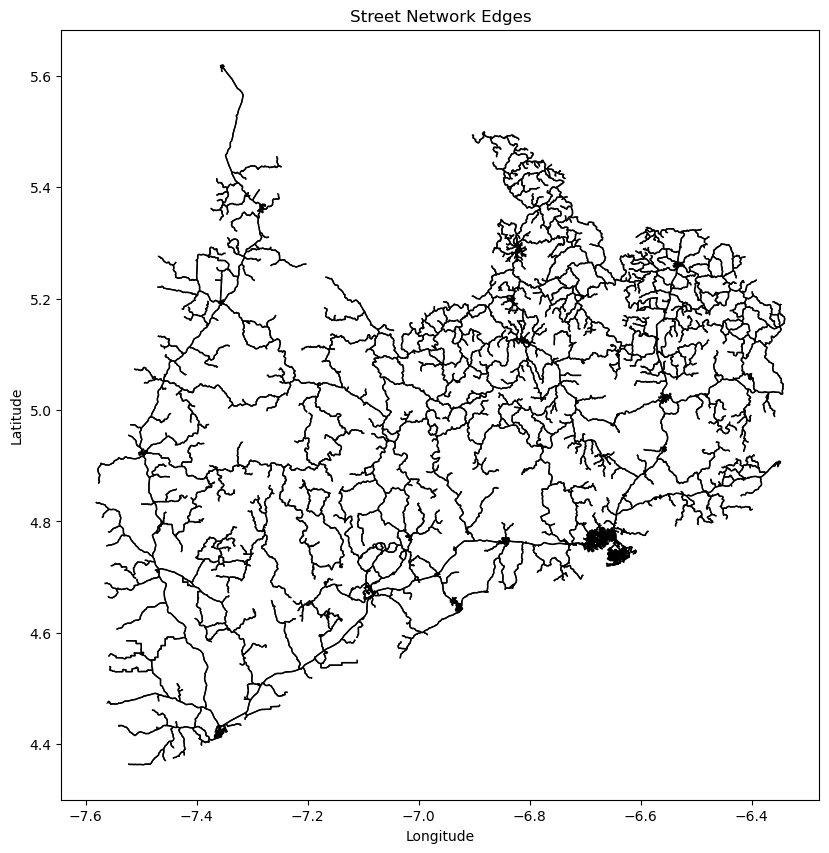

In [ ]:
# Plot the street network
gdf_edges.plot(figsize=(10, 10), color="black", linewidth=1)

# Add title and axis labels
plt.title("Street Network Edges")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

In [ ]:
gdf_edges["highway"].value_counts()

highway
residential                    13602
unclassified                    6079
primary                          833
tertiary                         682
secondary                        111
[residential, unclassified]       46
tertiary_link                      5
[tertiary, unclassified]           2
primary_link                       2
secondary_link                     1
Name: count, dtype: int64

In [ ]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

12727009812.46858

In [ ]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 8288,
 'm': 21363,
 'k_avg': 5.1551640926640925,
 'edge_length_total': 10702178.619999945,
 'edge_length_avg': 500.96796423723003,
 'streets_per_node_avg': 2.618122586872587,
 'streets_per_node_counts': {0: 0, 1: 2012, 2: 4, 3: 5414, 4: 854, 5: 3, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24276061776061775,
  2: 0.00048262548262548264,
  3: 0.6532335907335908,
  4: 0.10304054054054054,
  5: 0.00036196911196911195,
  6: 0.00012065637065637066},
 'intersection_count': 6276,
 'street_length_total': 5371589.532000009,
 'street_segment_count': 10829,
 'street_length_avg': 496.0374487025588,
 'circuity_avg': 1.18882249540931,
 'self_loop_proportion': 0.0007387570412780497,
 'clean_intersection_count': 5415,
 'node_density_km': 0.6512134525016468,
 'intersection_density_km': 0.49312447247832225,
 'edge_density_km': 840.9028340274461,
 'street_density_km': 422.0621820168232,
 'clean_intersection_density_km': 0.4254730749633708}

In [ ]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
# ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
# ox.save_graphml(G, filepath="./data/mynetwork.graphml")

In [ ]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

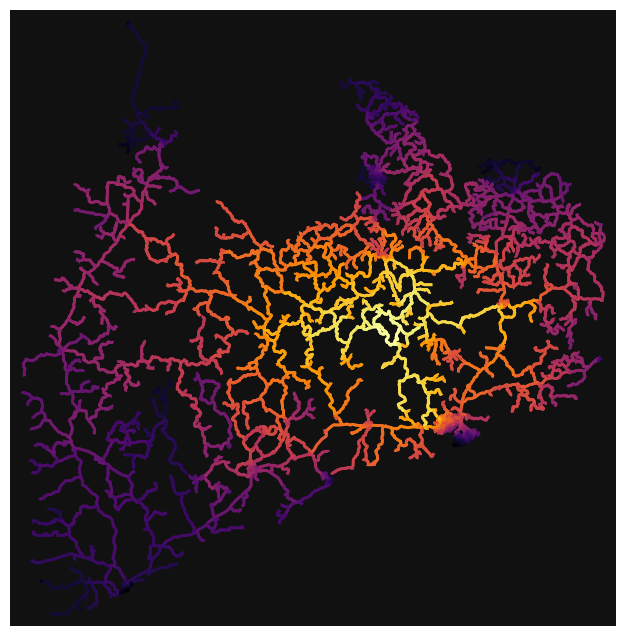

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [ ]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [ ]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=-16.025972, Y=16.503626)
dest = ox.distance.nearest_nodes(G, X=16.050927, Y=-16.454727)

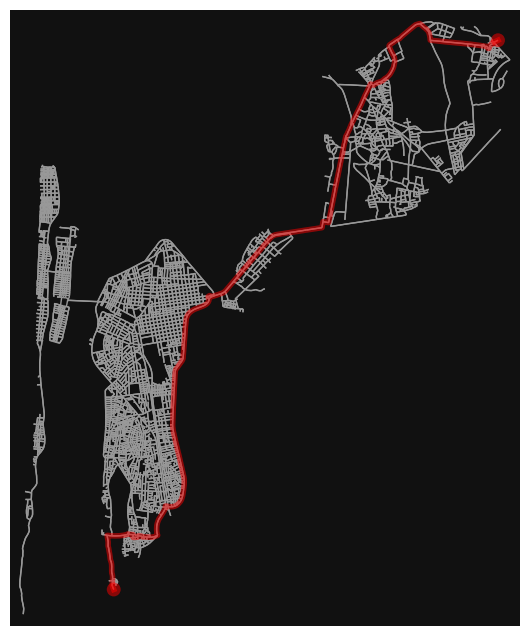

In [ ]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

16487

In [ ]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

12728